In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prince import FAMD

In [ ]:
X_ini=pd.read_excel('DB_J(RRN,RTE500).xlsx') 
X_ini=X_ini.iloc[680:1689,:]
X_ini=X_ini.reset_index()
X_ini=X_ini.drop(['index'],axis=1)
X=X_ini.drop(['T2007','T2008','T2009','T2010','T2011','T2012','T2013','T2014','T2015'], axis=1) 
X=X.fillna('-999')

famd = FAMD(n_components =11, n_iter = 3, random_state = 101)
famd.fit(X)
#print(famd.transform(X))
X=famd.transform(X)

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']

In [ ]:
# ACP :
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_pca=pca.fit_transform(X)   # Matrice obtenue après application de l'ACP
print(pca.explained_variance_ratio_.cumsum())
expl_var=pca.explained_variance_ratio_
print(expl_var)
X_pca=pd.DataFrame(X_pca)

[0.20623692 0.39853291 0.52920475 0.62015732 0.69320312 0.75715919
 0.81379931 0.86449645 0.91234133 0.9568538  1.        ]
[0.20623692 0.19229599 0.13067184 0.09095256 0.0730458  0.06395607
 0.05664012 0.05069714 0.04784488 0.04451247 0.0431462 ]


2


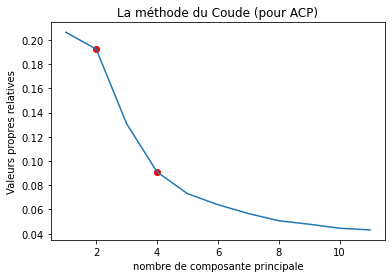

In [ ]:
########### Détermination du choix du nombre de composante principale #########
# 1- Critère de Kalis-Saporta-Spinakis :
import math
KSS=1-math.sqrt((X_pca.shape[1]-1)/(X_pca.shape[0]-1))  #Coefficient de Kalis-Saporta-Spinakis
n_CP=0
for vap in pca.explained_variance_:  # Les valeurs propres associées à chaque composante principale
    if vap>KSS:
        n_CP=n_CP+1
print(n_CP)   # Nombre de composante principale à conservé (=2) 

# 2- Critère du Coude :
VAR_total=sum(pca.explained_variance_)
Vap_vartotal=pca.explained_variance_/VAR_total
plt.plot(range(1,len(Vap_vartotal)+1),Vap_vartotal)
plt.scatter(2, Vap_vartotal[1], c = "red")
plt.scatter(4, Vap_vartotal[3], c = "red")
plt.title("La méthode du Coude (pour ACP)")
plt.xlabel("nombre de composante principale")
plt.ylabel("Valeurs propres relatives")
plt.show()

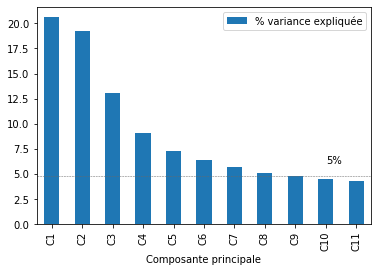

In [ ]:
ratio=pca.explained_variance_ratio_
eig = pd.DataFrame(
    {
        "Composante principale" : ["C" + str(x+1) for x in range(11)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : ratio*100,
        # "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig.plot.bar(x = "Composante principale", y = "% variance expliquée") # permet un diagramme en barres
plt.text(9, 6, "5%")
plt.axhline(y = 4.8, linewidth = .5, color = "dimgray", linestyle = "--") 
plt.show()